## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [76]:
print(np.isnan(y))
print(X.isna().any().any())
print(X.dtypes)
# В базе данных нет пропущенных значений. В базе данных категориальных переменных нет.

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [77]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [79]:
normalizer = StandardScaler()
X_train_2 = X_train[['alcohol', 'magnesium']]
X_train_2_norm = normalizer.fit_transform(X_train_2)
X_train_2_norm = pd.DataFrame(data=X_train_2_norm)

X_test_2 = X_test[['alcohol', 'magnesium']]
X_test_2_norm = normalizer.fit_transform(X_test_2)
X_test_2_norm = pd.DataFrame(data=X_test_2_norm)

clf1 = KNeighborsClassifier(n_neighbors=1, p=2, n_jobs=10)
clf2 = KNeighborsClassifier(n_neighbors=3, p=2, n_jobs=10)
clf3 = KNeighborsClassifier(n_neighbors=5, p=2, n_jobs=10)
clf4 = KNeighborsClassifier(n_neighbors=10, p=2, n_jobs=10)
clf5 = KNeighborsClassifier(n_neighbors=15, p=2, n_jobs=10)
clf6 = KNeighborsClassifier(n_neighbors=25, p=2, n_jobs=10)


#TEST
clf1.fit(X_train_2_norm, y_train)
y_predicted1 = clf1.predict(X_test_2_norm) 
clf2.fit(X_train_2_norm, y_train)
y_predicted2 = clf2.predict(X_test_2_norm)
clf3.fit(X_train_2_norm, y_train)
y_predicted3 = clf3.predict(X_test_2_norm)
clf4.fit(X_train_2_norm, y_train)
y_predicted4 = clf4.predict(X_test_2_norm)
clf5.fit(X_train_2_norm, y_train)
y_predicted5 = clf5.predict(X_test_2_norm)
clf6.fit(X_train_2_norm, y_train)
y_predicted6 = clf6.predict(X_test_2_norm)

#TRAIN
y_predicted7 = clf1.predict(X_train_2_norm)

y_predicted8 = clf2.predict(X_train_2_norm)

y_predicted9 = clf3.predict(X_train_2_norm)

y_predicted10 = clf4.predict(X_train_2_norm)

y_predicted11 = clf5.predict(X_train_2_norm)

y_predicted12 = clf6.predict(X_train_2_norm)

print('## K-Nearest-Neighbours results ##')
print('NN' + "    "+ "Train"+ "  "+"Test")
print(f'1     {np.round(np.mean(y_train == y_predicted7), 2)}   {np.round(np.mean(y_test == y_predicted1), 2)}    ')
print(f'3     {np.round(np.mean(y_train == y_predicted8), 2)}   {np.round(np.mean(y_test == y_predicted2), 2)}    ')
print(f'5     {np.round(np.mean(y_train == y_predicted9), 2)}   {np.round(np.mean(y_test == y_predicted3), 2)}    ')
print(f'10    {np.round(np.mean(y_train == y_predicted10), 2)}   {np.round(np.mean(y_test == y_predicted4), 2)}    ')
print(f'15    {np.round(np.mean(y_train == y_predicted11), 2)}   {np.round(np.mean(y_test == y_predicted5), 2)}    ')
print(f'25    {np.round(np.mean(y_train == y_predicted12), 2)}   {np.round(np.mean(y_test == y_predicted6), 2)}    ')

## K-Nearest-Neighbours results ##
NN    Train  Test
1     0.99   0.65    
3     0.78   0.65    
5     0.77   0.7    
10    0.73   0.54    
15    0.73   0.57    
25    0.72   0.61    


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [94]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [80]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

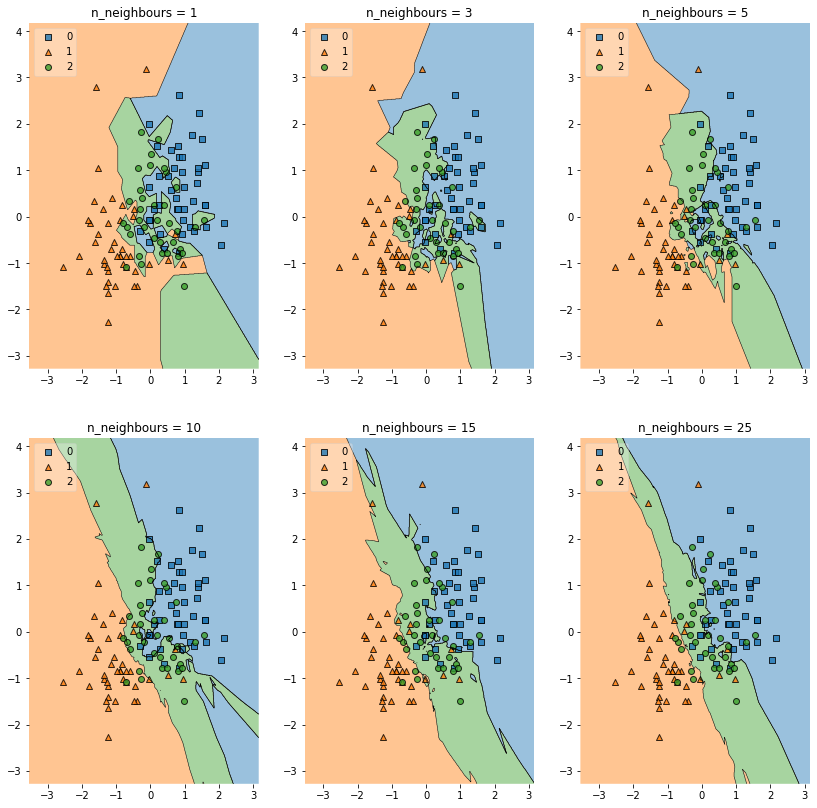

In [81]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

X_train_2 = X_train[['alcohol', 'magnesium']]
X_train_2_norm = normalizer.fit_transform(X_train_2)

clf1 = KNeighborsClassifier(n_neighbors=1, p=2, n_jobs=10)
clf2 = KNeighborsClassifier(n_neighbors=3, p=2, n_jobs=10)
clf3 = KNeighborsClassifier(n_neighbors=5, p=2, n_jobs=10)
clf4 = KNeighborsClassifier(n_neighbors=10, p=2, n_jobs=10)
clf5 = KNeighborsClassifier(n_neighbors=15, p=2, n_jobs=10)
clf6 = KNeighborsClassifier(n_neighbors=25, p=2, n_jobs=10)

clf1.fit(X_train_2_norm, y_train)
clf2.fit(X_train_2_norm, y_train)
clf3.fit(X_train_2_norm, y_train)
clf4.fit(X_train_2_norm, y_train)
clf5.fit(X_train_2_norm, y_train)
clf6.fit(X_train_2_norm, y_train)

fig = plt.figure(figsize = (14,14))
ax1 = fig.add_subplot(2,3,1)
plot_decision_regions(X_train_2_norm, y_train, clf=clf1, legend=2)
ax2 = fig.add_subplot(2,3,2)
plot_decision_regions(X_train_2_norm, y_train, clf=clf2, legend=2)
ax3 = fig.add_subplot(2,3,3)
plot_decision_regions(X_train_2_norm, y_train, clf=clf3, legend=2)
ax4 = fig.add_subplot(2,3,4)
plot_decision_regions(X_train_2_norm, y_train, clf=clf4, legend=2)
ax5 = fig.add_subplot(2,3,5)
plot_decision_regions(X_train_2_norm, y_train, clf=clf5, legend=2)
ax6 = fig.add_subplot(2,3,6)
plot_decision_regions(X_train_2_norm, y_train, clf=clf6, legend=2)
ax1.title.set_text('n_neighbours = 1')
ax2.title.set_text('n_neighbours = 3')
ax3.title.set_text('n_neighbours = 5')
ax4.title.set_text('n_neighbours = 10')
ax5.title.set_text('n_neighbours = 15')
ax6.title.set_text('n_neighbours = 25')
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

**Ответ**: Исходя из результатов, полученных в задаче 1.3, модель наилучшим образом на тестовой выборки показывает себя при числе соседей равным 5 (точность составляет 0.7). Также стоит обратить внимание на решающие поверхности, которые мы получили в задача 1.5, стоит обратить внимание на то, что при числе соседей равным 5 решающая поверхность получилась наименее разреженной и резкой, что обуславливает высокую точность результатов. 

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

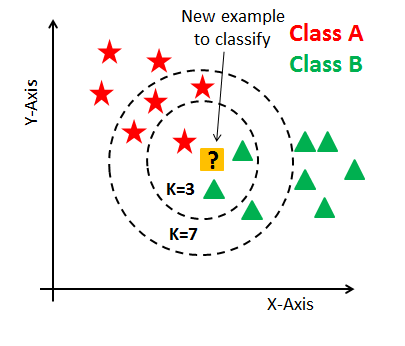

**Примечания и пояснения к коду**: про способность библиотеки scipy вычислить евклидовы расстояния узнали тут: https://itsmycode.com/calculate-euclidean-distance-in-python/. В fit мы просто запоминаем полученную тренировочную выборку, а в predict собственно и выполняем алогритм KNN: вычисляем евклидовы расстояния от каждого объекта обучающей выборки до каждого объекта тестовой (сохраняем в totaldist). Потом сортируем полученный список расстояний и выбираем первые k значений. Потом узнаем классы по полученным расстояниям, сохраняем полученные классы в votes. потом с помощью модуля Counter получаем наиболее встречающиеся классы среди k соседей, сохраняем в predicted и переводим predicted в np.array.

In [85]:
import numpy as np
from collections import Counter 
import scipy.spatial

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X_test):
        num_obs_test = X_test.shape[0]
        num_obs_train = self.X_train.shape[0]

        totaldist = []
        votes = []
        predicted = []
        for observation in range(num_obs_test):
            totaldist = []
            votes = []
            for observation2 in range(num_obs_train):
                dist =  scipy.spatial.distance.euclidean(self.X_train[observation2] , X_test[observation])
                totaldist.append([dist, observation2])
            totaldist = sorted(totaldist)[:self.k]
            for i, j in totaldist:
                votes.append(self.y_train[j])
            predicted.append(Counter(votes).most_common(1)[0][0])
            predictedfin = np.array(predicted)
        
        return predictedfin

In [86]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0]) 

In [87]:
# Если тесты эти пройдены, то все верно!
print(test_knn(KNN))

None


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [88]:
data = pd.read_csv('https://raw.githubusercontent.com/rguseinov/iadfiles/main/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [89]:
data.isna().any().any() #в наборе данных пропущенных значений нет

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [90]:
data = data.drop(['depth', 'table'], axis = 1)

**Пояснение**: нам кажется, что бессмысленными признаками являются depth и table, так как они по сути являются либо процентным выражением другого признака, либо являются отношение к какой-либо категории, как, например, с table (ширина относительно самой широкой части). 

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [91]:
tocorr = data[['carat', 'x', 'y', 'z', 'price']]
corrmatrix = pd.DataFrame(data = tocorr.corr())
corrmatrix = corrmatrix.drop(['carat', 'x', 'y', 'z'], axis = 1)
corrmatrix

,price
carat,0.921591
x,0.884435
y,0.865421
z,0.861249
price,1.000000


**Ответ**: Ну, конечно, наивысшая корреляция у целевой цеременной с самой целевой переменной). Если говорить про независимые переменные, то наблюдается высокая корреляционная связь с признаками carat, x, y, z - коэффициент корреляции у них не сильно отклоняется друг от друга, поэтому мы указали их все. Самая высокая корреляция у признака carat.

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [92]:
data_dum = pd.get_dummies(data, drop_first = True)
data_dum

,Unnamed: 0,carat,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,326,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,326,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0.23,327,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,334,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,5,0.31,335,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,2757,5.75,5.76,3.50,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,53937,0.72,2757,5.69,5.75,3.61,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,53938,0.70,2757,5.66,5.68,3.56,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53938,53939,0.86,2757,6.15,6.12,3.74,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [93]:
X = data_dum.drop(['Unnamed: 0', 'price'], axis = 1)
y = pd.DataFrame(data = data_dum['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [94]:
from sklearn.compose import make_column_transformer
normalizer = StandardScaler()
ct = make_column_transformer((
normalizer, ['carat', 'x', 'y', 'z']), remainder = 'passthrough')

In [95]:
X_train = ct.fit_transform(X_train)
X_train = pd.DataFrame(data = X_train)

X_test = ct.fit_transform(X_test)
X_test = pd.DataFrame(data = X_test)

**Пояснение**: мы масштабировали только независимые переменные, так как при масштабировании могли произойти серьезные изменения с функционалом ошибки.

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train)
y_pred_test = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

print(f'Среднеквадратичная ошибка на тестовой выборке: {mean_squared_error(y_pred_test, y_test)}')
print(f'Среднеквадратичная ошибка на тренировочной выборке: {mean_squared_error(y_pred_train, y_train)}')

Среднеквадратичная ошибка на тестовой выборке: 1332456.1462792295
Среднеквадратичная ошибка на тренировочной выборке: 1271893.746833927


Среднеквадратичная ошибка на тестовой выборке выше, чем на тренировочной. Оно и понятно, на тренировочной выборке есть риск переобученности или более высокой обученности.

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [97]:
print(f'Оценки коэффициентов: {reg.coef_}')

Оценки коэффициентов: [[ 5242.46677524  -769.54887606   129.50331609  -456.2501538
    684.21731796  1021.86935535   884.44466811   864.20178123
   -205.47177705  -267.62560747  -468.44694562  -970.91542905
  -1446.56226578 -2322.15786029  5392.66819078  3712.91861179
   2754.9057157   4638.5617969   4320.36164438  5065.3456237
   5001.39243128]]


**Вывод**: Такая переменная по сути у нас только одна: carat

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [98]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

lassoreg = Lasso(alpha = 10).fit(X_train, y_train)
ylasso_pred_test = lassoreg.predict(X_test)
ylasso_pred_train = lassoreg.predict(X_train)

ridgereg = Ridge(alpha = 10).fit(X_train, y_train)
yridge_pred_test = ridgereg.predict(X_test)
yridge_pred_train = ridgereg.predict(X_train)



print(f'Коэффициенты линейной модели: {reg.coef_}')
print(f'Коэффициенты Ridge-модели: {ridgereg.coef_}')
print(f'Коэффициенты Lasso-модели: {lassoreg.coef_}')

Коэффициенты линейной модели: [[ 5242.46677524  -769.54887606   129.50331609  -456.2501538
    684.21731796  1021.86935535   884.44466811   864.20178123
   -205.47177705  -267.62560747  -468.44694562  -970.91542905
  -1446.56226578 -2322.15786029  5392.66819078  3712.91861179
   2754.9057157   4638.5617969   4320.36164438  5065.3456237
   5001.39243128]]
Коэффициенты Ridge-модели: [[ 5191.34535172  -729.12890805   133.75420936  -462.79469115
    704.70628299  1051.78134324   907.84057898   893.48426438
   -193.55944218  -255.49326892  -450.7579854   -953.3773175
  -1422.11727999 -2284.79702882  4771.8680206   3137.05022832
   2186.95613847  4053.65124948  3741.10267525  4466.70653431
   4410.10294346]]
Коэффициенты Lasso-модели: [ 4668.86791157   -34.45057846    -0.          -620.67931917
     0.           361.50749981   147.0745311    188.81247149
     0.            -0.          -107.20581479  -599.72715374
  -987.81947685 -1730.54622736  1314.52855279     0.
  -808.03281419   835.886

**Вывод**: Как мы видим, веса несильно уменьшились, но с некоторыми оговорками. Например, Lasso регрессия занулила некоторые признаки, что утверждает их неинформативность. При этом признак carat, который наиболе коррелируем с целевой переменной, в Ridge регрессии был оштрафован несильно, а вот в Lasso регрессии довольно сильно. Но в целом картина такова, что изначально проблема мультиколлинеарности проявилась довольно сильно, потому и штрафы сработали лишь частично. Более того, мы не шкалировали целевую переменную, что из-за разной размерности величин приводит к высоким весам. Более того, эффект регуляризации может объясняться значением гиперпараметра, который, возможно, является не самым оптимальным.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [99]:
ridgereg1 = Ridge(alpha = 0.1).fit(X_train, y_train)
ridgereg2 = Ridge(alpha = 1).fit(X_train, y_train)
ridgereg3 = Ridge(alpha = 10).fit(X_train, y_train)
ridgereg4 = Ridge(alpha = 100).fit(X_train, y_train)
ridgereg5 = Ridge(alpha = 200).fit(X_train, y_train)


lassoreg1 = Lasso(alpha = 0.1).fit(X_train, y_train)
lassoreg2 = Lasso(alpha = 1).fit(X_train, y_train)
lassoreg3 = Lasso(alpha = 10).fit(X_train, y_train)
lassoreg4 = Lasso(alpha = 100).fit(X_train, y_train)
lassoreg5 = Lasso(alpha = 200).fit(X_train, y_train)

yridge = [np.linalg.norm(ridgereg1.coef_), np.linalg.norm(ridgereg2.coef_), np.linalg.norm(ridgereg3.coef_), np.linalg.norm(ridgereg4.coef_), np.linalg.norm(ridgereg5.coef_)]
ylasso = [np.linalg.norm(lassoreg1.coef_), np.linalg.norm(lassoreg2.coef_), np.linalg.norm(lassoreg3.coef_), np.linalg.norm(lassoreg4.coef_), np.linalg.norm(lassoreg5.coef_)]

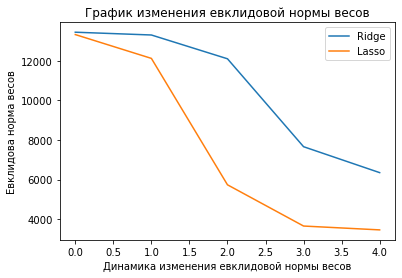

In [100]:
plt.plot(yridge)
plt.plot(ylasso)
plt.xlabel('Динамика изменения евклидовой нормы весов')
plt.ylabel('Евклидова норма весов')
plt.title('График изменения евклидовой нормы весов')
plt.legend(labels = ['Ridge', 'Lasso'])
plt.show()

**Вывод**: можно заметить, что Lasso-регрессия агрессивнее уменьшает веса, быстрее уводит весы в ноль. Именно по этой причине Lasso-регрессию используют для поиска лишних признаков и последующего отбора для модели. С помощью агрессивного снижения весов Lasso-регрессией можно подбирать информативные и неинформативные признаки, и потому отбирать нужные для модели. 

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [101]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas = [0.1, 1, 10, 100, 200], cv = 5, tol=1e-2)

reg = lasso.fit(X_train, y_train.to_numpy().ravel())
mse = reg.mse_path_
print(f'Матрица ошибок: {mse}') #матрица ошибок
print(f'Значения параметров регуляризации: {list(map(float, reg.alphas_))}') #200, 100, 10, 1, 0.1 - значения параметров регуляризации в соответствии с порядком
print(f'Усредненные ошибки в матрице ошибок: {mse.mean(axis = 1)}') #меньше всего ошибка начинает уменьшаться при параметре регуляризации 10, стоит выбрать его.

Матрица ошибок: [[2401971.90452392 2488555.36672008 2451628.16957518 2454784.85275893
  2272209.49943694]
 [2208714.02637451 2301818.49342155 2260531.64727583 2265141.25346431
  2089203.9131495 ]
 [1526576.5624722  1566228.91204329 1507058.96046038 1570854.47233895
  1383382.23177575]
 [1307978.32080422 1343280.02722189 1254265.76076472 1315380.34414424
  1193478.70551899]
 [1304693.46814383 1334187.21415264 1247987.52220871 1303166.09518805
  1193695.20894929]]
Значения параметров регуляризации: [200.0, 100.0, 10.0, 1.0, 0.1]
Усредненные ошибки в матрице ошибок: [2413829.95860301 2225081.86673714 1510820.22781811 1282876.63169081
 1276745.90172851]


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [102]:
lassoregfinal = Lasso(alpha = 10).fit(X_train, y_train)
print(f'Полученные коэффициенты модели: {lassoregfinal.coef_}')

Полученные коэффициенты модели: [ 4668.86791157   -34.45057846    -0.          -620.67931917
     0.           361.50749981   147.0745311    188.81247149
     0.            -0.          -107.20581479  -599.72715374
  -987.81947685 -1730.54622736  1314.52855279     0.
  -808.03281419   835.88678767   582.87431502  1170.15114073
  1169.58754124]


**Вывод**: Таким образом, самым информативным вещественным признаком по полученной Lasso регрессии является признак carat - оно и понятно, ведь карат как ювелирная мера веса наиболее сильным образом влияет на итоговую стоимость любой драгоценности. При этом размеры, выраженные в длине и ширине, являются слабо информативными или неинформативными. Глубина объекта при этом является относительно информативным. Также модель утвердила информативность многих закодированных с помощью OneHot категориальных признаков, равно как и неинформативность многих других.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [103]:
lassopred = lassoregfinal.predict(X_test)
print(f'MSE для LASSO-модели: {mean_squared_error(lassopred, y_test)}, MSE для линейной модели: {mean_squared_error(y_pred_test, y_test)}')

MSE для LASSO-модели: 1615973.978568002, MSE для линейной модели: 1332456.1462792295


**Объяснение**: Судя по полученным MSE, все же меньше при предсказании мы будем ошибаться, используя обычную линейную модель. Прчиина может заключаться в самой концепции регуляризации и штрафа в LASSO регрессии: избавляясь от, как LASSO кажется, неинформативных признаков, мы снижаем предсказательную силу модели. Более того, в самой линейной модели заложен МНК, который по умолчанию минимизирует MSE без регуляризации.